In [226]:
!pip install shap

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
%matplotlib inline

In [229]:
# 1. Load data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [230]:
# 2. Clean data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [231]:
# 3. Encode categorical variables
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [232]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [233]:
# 4. Feature-target split
X = df.drop('Churn', axis=1)
y = df['Churn']

In [234]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
# 6. Train models
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [236]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Logistic_Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



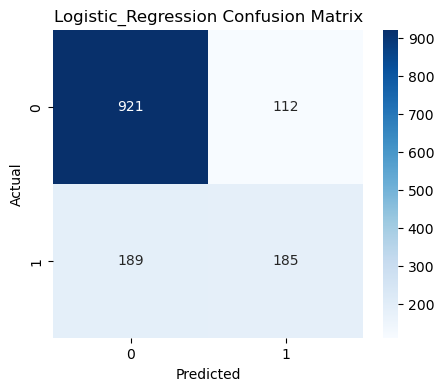

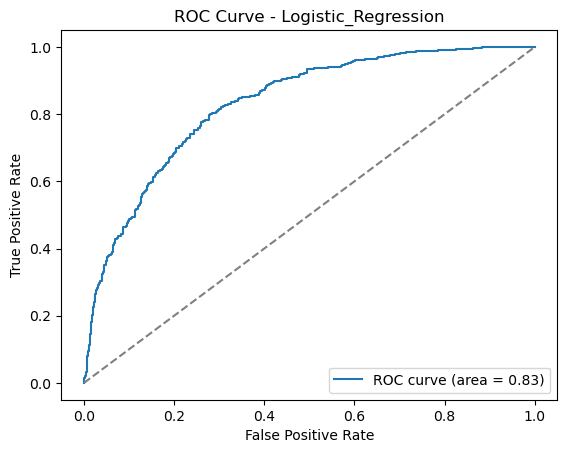


Random_Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



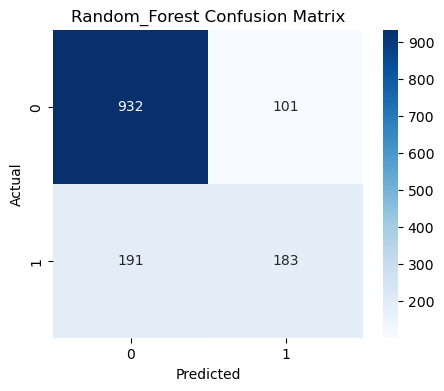

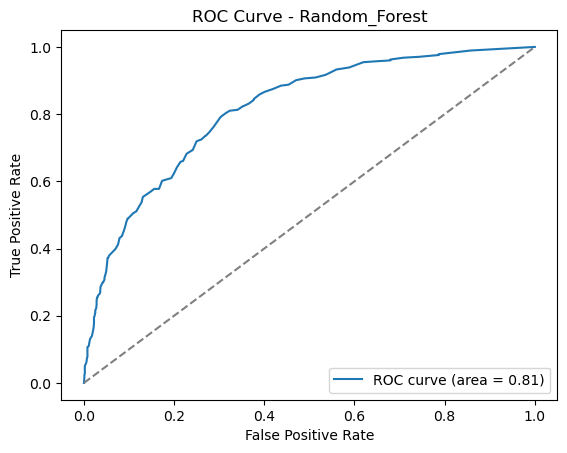

In [249]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Ensure output folder exists
output_dir = "images_segmentation/"
os.makedirs(output_dir, exist_ok=True)

for model, name in zip([logreg, rf], ["Logistic_Regression", "Random_Forest"]):
    # Predictions
    y_pred = model.predict(X_test)

    # 1️⃣ Classification Report
    print(f"\n{name} Classification Report")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # Save classification report as CSV
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv(f"{output_dir}{name}_classification_report.csv")

    # 2️⃣ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"{output_dir}{name}_confusion_matrix.png", bbox_inches='tight')
    plt.show()

    # 3️⃣ ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.savefig(f"{output_dir}{name}_roc_curve.png", bbox_inches='tight')
        plt.show()

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Ensure your full DataFrame has the right features
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Use pandas DataFrame (not NumPy!)
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest on the DataFrame
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_df, y_train)


RandomForestClassifier(random_state=42)

In [196]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## Use Clean DataFrame Only
Ensure you use a DataFrame with 100% numerical + encoded values.

In [199]:
# Example: Assume df is already preprocessed
X = df.drop('Churn', axis=1)
y = df['Churn']

# Keep as DataFrame — DO NOT convert to NumPy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Tain Random Forest on DataFrame

In [204]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Use TreeExplainer + Check Shapes

In [207]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Print shape check
print("shap_values[1] shape:", np.array(shap_values[1]).shape)  # Should match X_test
print("X_test shape:", X_test.shape)


shap_values[1] shape: (19, 2)
X_test shape: (1407, 19)


## Shap Feature Importance Bar Plot(Top Contributors)

In [261]:
import shap
import matplotlib.pyplot as plt

# Transpose SHAP values so rows = samples, columns = features
shap_values_corrected = shap_values[1].T
print("Corrected SHAP shape:", shap_values_corrected.shape)

shap.summary_plot(shap_values_corrected, X_test_df, plot_type='bar', show=False)
plt.savefig("images_segmentation/shap_feature_importance_bar.png", dpi=300, bbox_inches='tight')
plt.close()

Corrected SHAP shape: (2, 19)


Corrected SHAP shape: (2, 19)


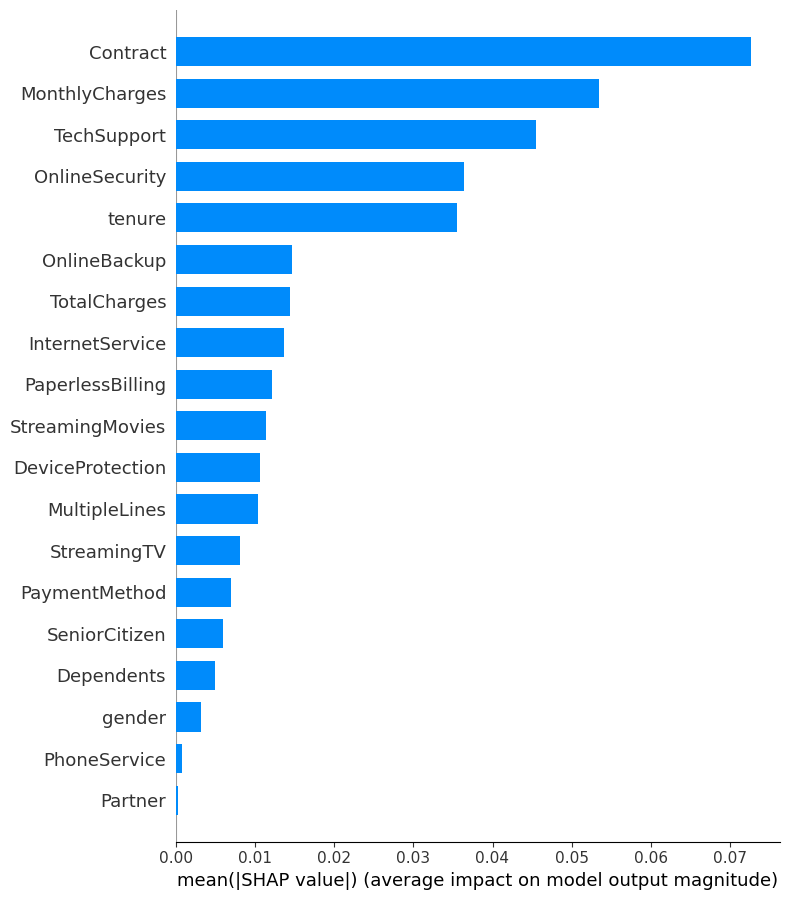

In [259]:
# Transpose so that rows = samples, columns = features
shap_values_corrected = shap_values[1].T  # Shape becomes (1407, 19)

print("Corrected SHAP shape:", shap_values_corrected.shape)

#plt.savefig("shap_feature_importance_bar.png", dpi=300)
plt.savefig("images_segmentation/shap_feature_importance_bar.png", dpi=300, bbox_inches='tight')
# Now plot
shap.summary_plot(shap_values_corrected, X_test_df, plot_type='bar', show=True)


## Force Plot

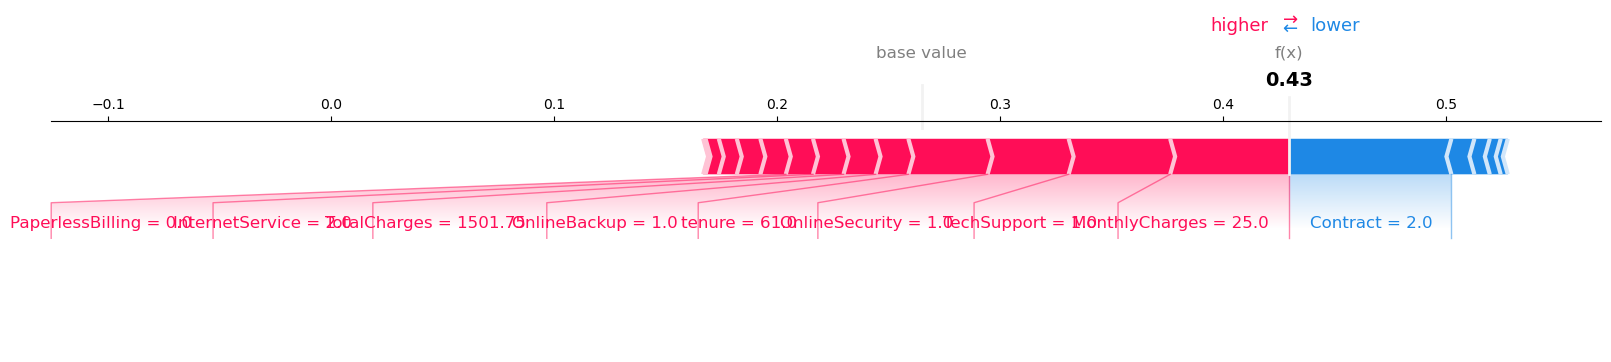

In [265]:
import shap
import matplotlib.pyplot as plt

# Pick a sample to explain
sample_idx = 0
sample = X_test.iloc[sample_idx]
sample_shap = shap_values_corrected[sample_idx]

shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    sample_shap,
    sample,
    matplotlib=True
)
plt.savefig("images_segmentation/shap_force_plot_sample.png", bbox_inches='tight')
plt.close()

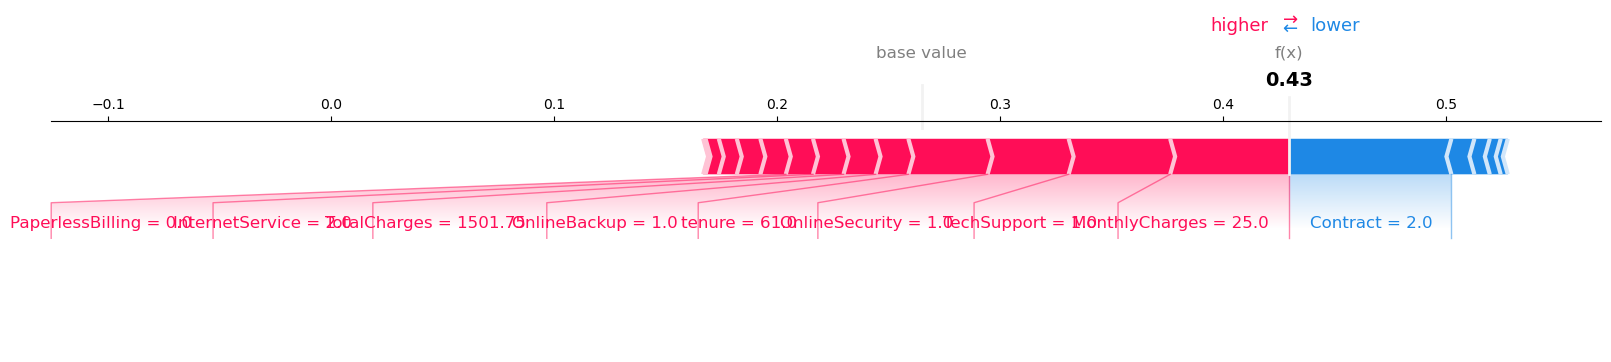

In [211]:
# Transpose SHAP values to (samples, features)
shap_values_corrected = shap_values[1].T  # shape: (1407, 19)

# Pick a sample to explain
sample_idx = 0
sample = X_test.iloc[sample_idx]
sample_shap = shap_values_corrected[sample_idx]  # shape: (19,)

# Now create the force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],  # For class 1
    sample_shap,
    sample,
    matplotlib=True
)
plt.savefig("/mnt/data/shap_force_plot_sample.png", bbox_inches='tight')


In [212]:
print(type(X_test_df))
print(X_test_df.columns)
print(X_test_df.head())
print(X_test_df.shape)


<class 'pandas.core.frame.DataFrame'>
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2481       1              1        1           0      61             1   
6784       0              0        0           0      19             1   
6125       1              0        1           0      13             1   
3052       1              0        1           0      37             1   
4099       0              0        0           0       6             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
2481              2                2               1             1   
6784              2

## SHAP Beeswarm Plot (All Features

In [267]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_df)

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test_df, show=False)
else:
    shap.summary_plot(shap_values, X_test_df, show=False)

plt.tight_layout()
plt.savefig("images_segmentation/shap_beeswarm_plot.png", dpi=300, bbox_inches='tight')
plt.close()

SHAP returned a single array with shape: (1407, 19, 2)


<Figure size 640x480 with 0 Axes>

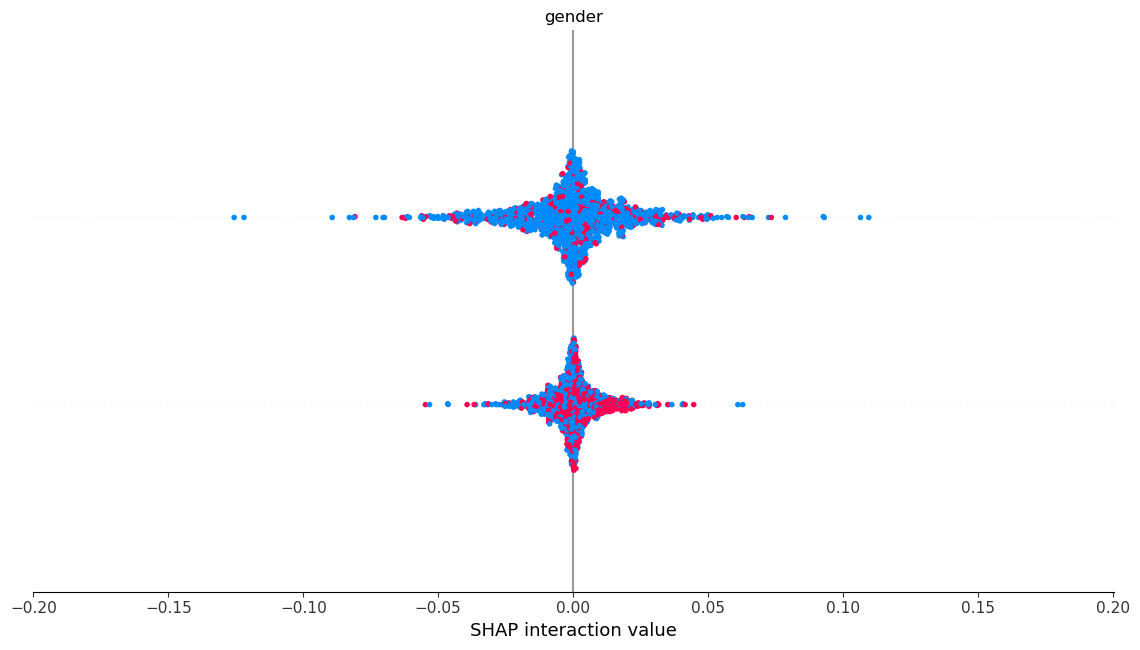

In [214]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_df)

# Check type and shape
if isinstance(shap_values, list):
    print("SHAP returned a list with", len(shap_values), "elements")
    print("Shape of class 1 SHAP values:", shap_values[1].shape)
    print("Shape of X_test_df:", X_test_df.shape)

    # Use only class 1 SHAP values
    shap.summary_plot(shap_values[1], X_test_df, show=False)
else:
    print("SHAP returned a single array with shape:", shap_values.shape)
    shap.summary_plot(shap_values, X_test_df, show=False)

plt.tight_layout()
plt.savefig("shap_beeswarm_plot.pdf")
plt.show()
